In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
mobile_prediction_data=pd.read_csv("train.csv")


In [3]:
mobile_prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
mobile_prediction_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
mobile_prediction_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
mobile_prediction_data.price_range.unique()

array([1, 2, 3, 0])

In [7]:
corr_mat=mobile_prediction_data.corr()

<AxesSubplot:>

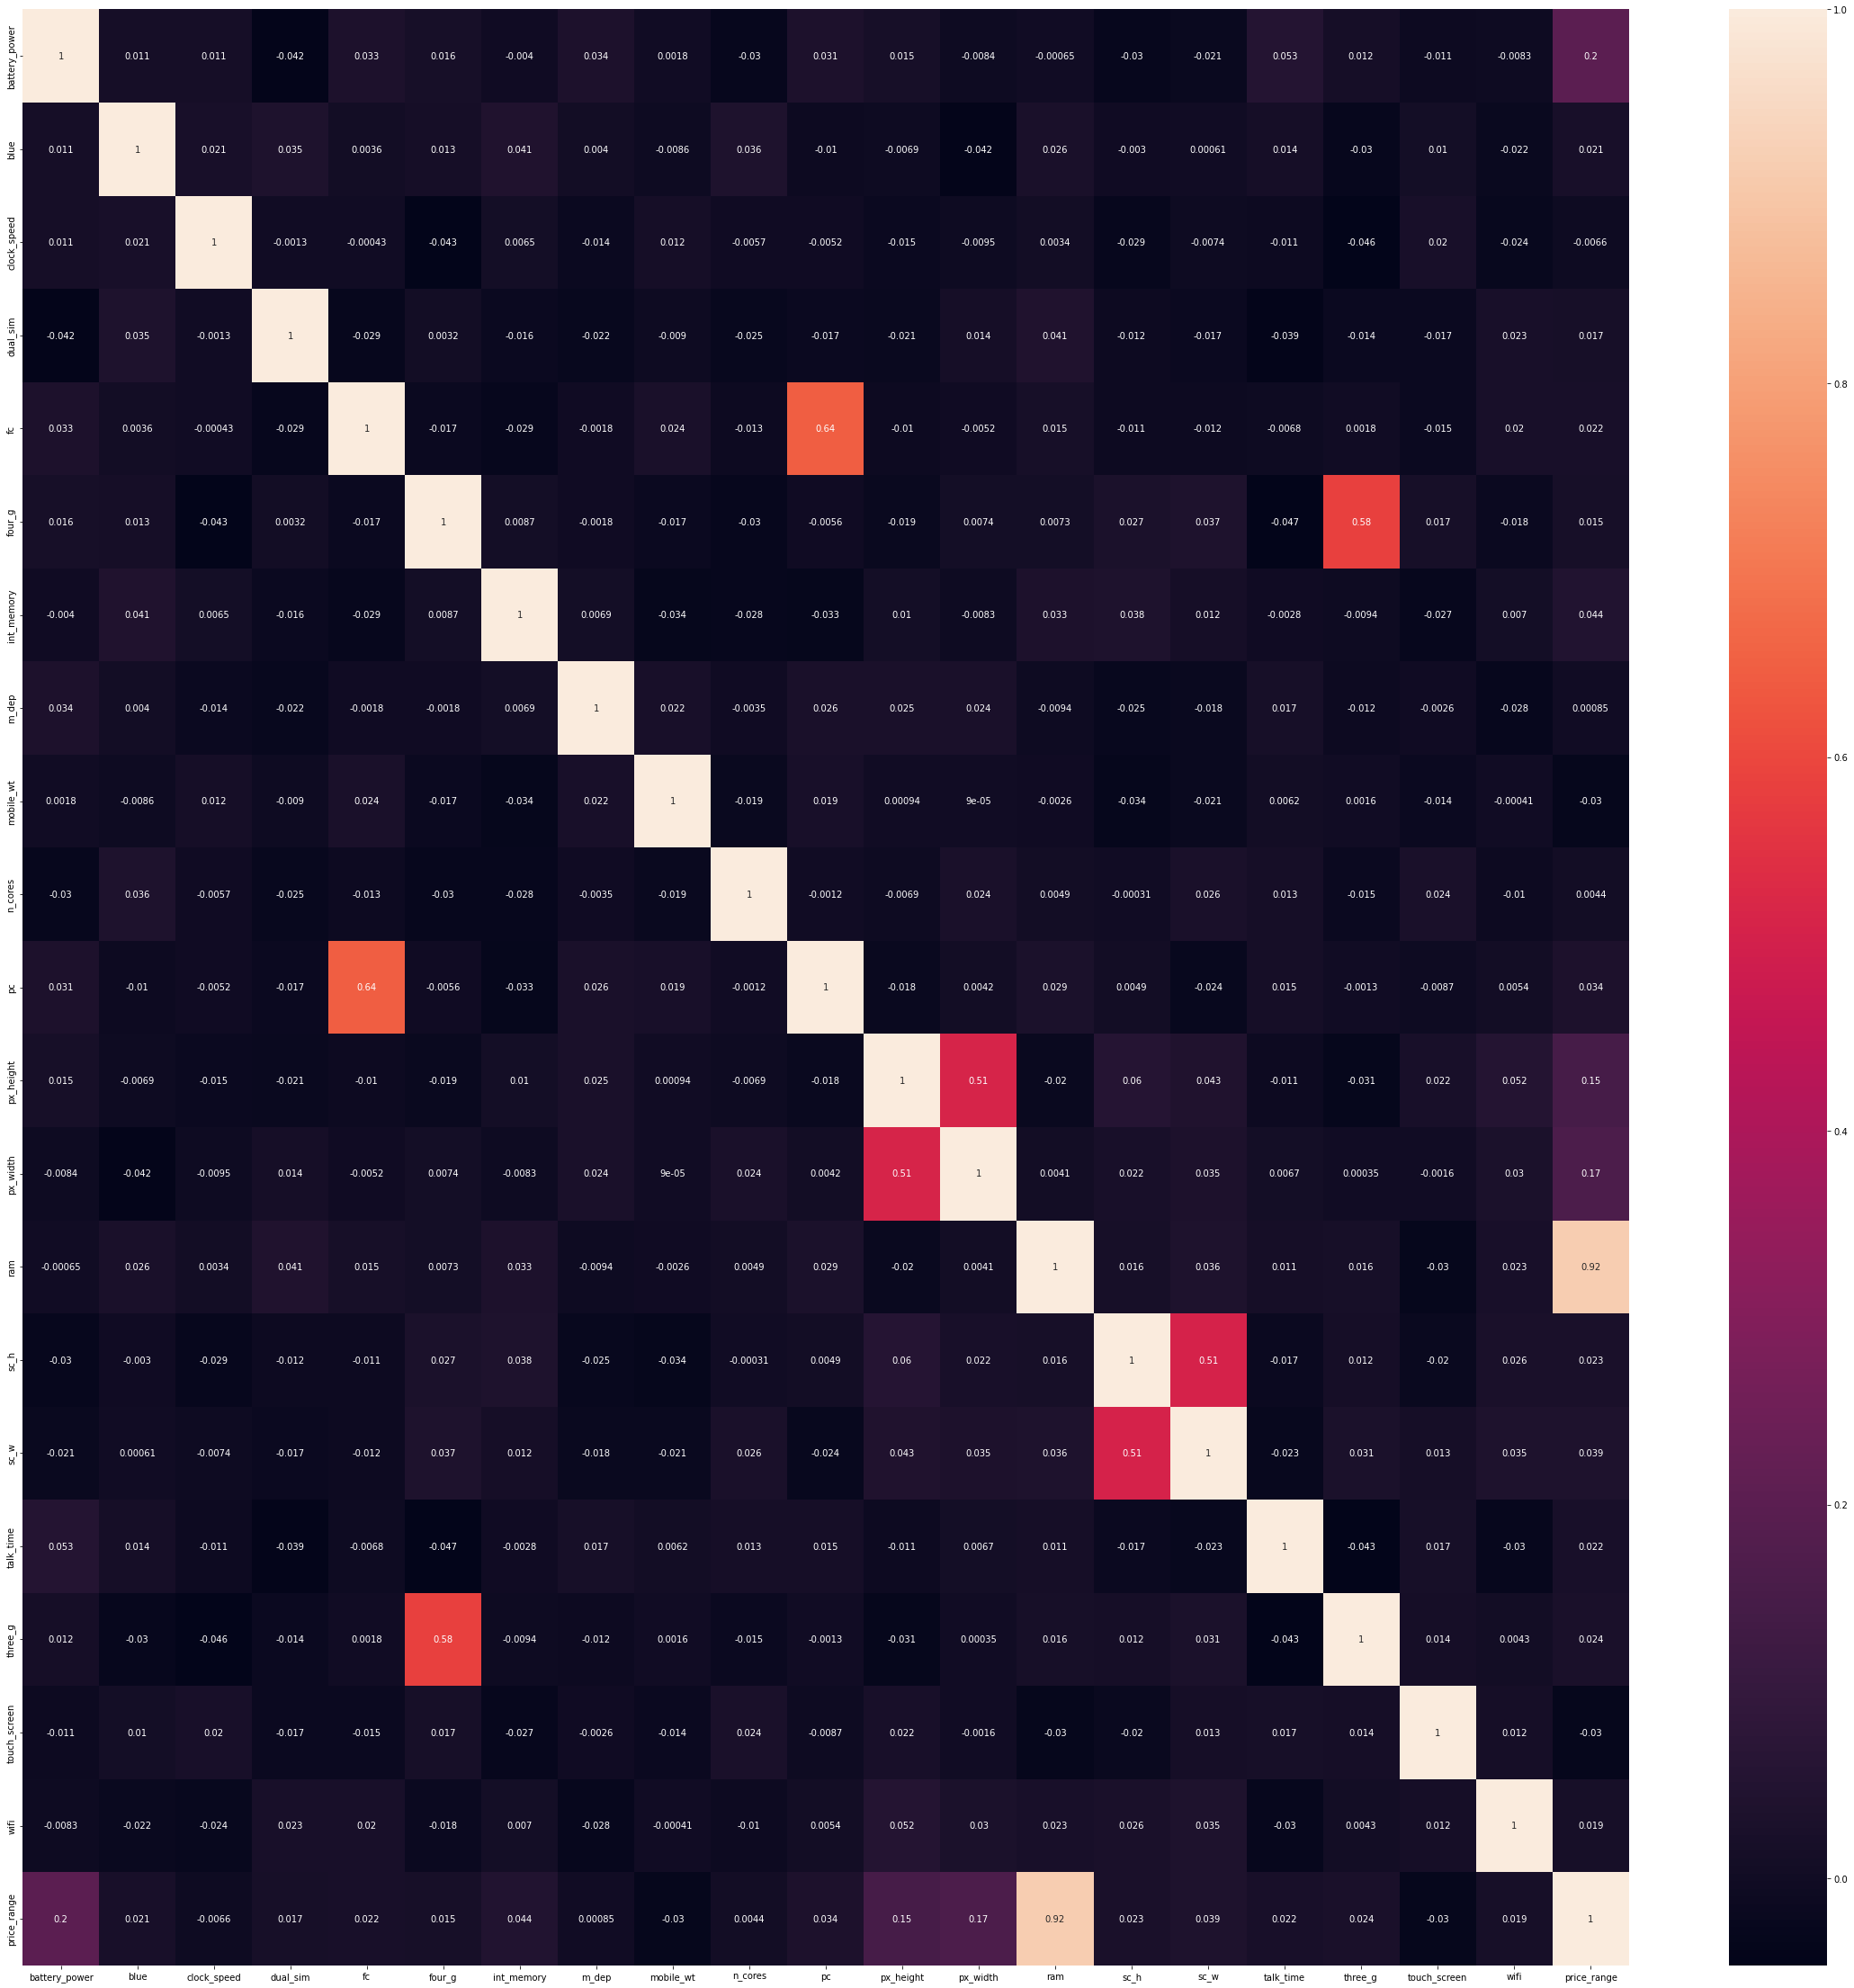

In [8]:
plt.figure(figsize=(40,40))
sns.heatmap(corr_mat,annot=True)

In [9]:
mobile_prediction_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [10]:
corr_mat=corr_mat[corr_mat["price_range"]<.3]

In [11]:
corr_mat

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [12]:
#sns.pairplot(mobile_prediction_data)

In [13]:
binary_cols=mobile_prediction_data.columns[mobile_prediction_data.nunique()<=2]

In [14]:
#variable more than 100 numeric values
cont_var=mobile_prediction_data.columns[mobile_prediction_data.nunique()>100]

In [15]:
binary_cols

Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], dtype='object')

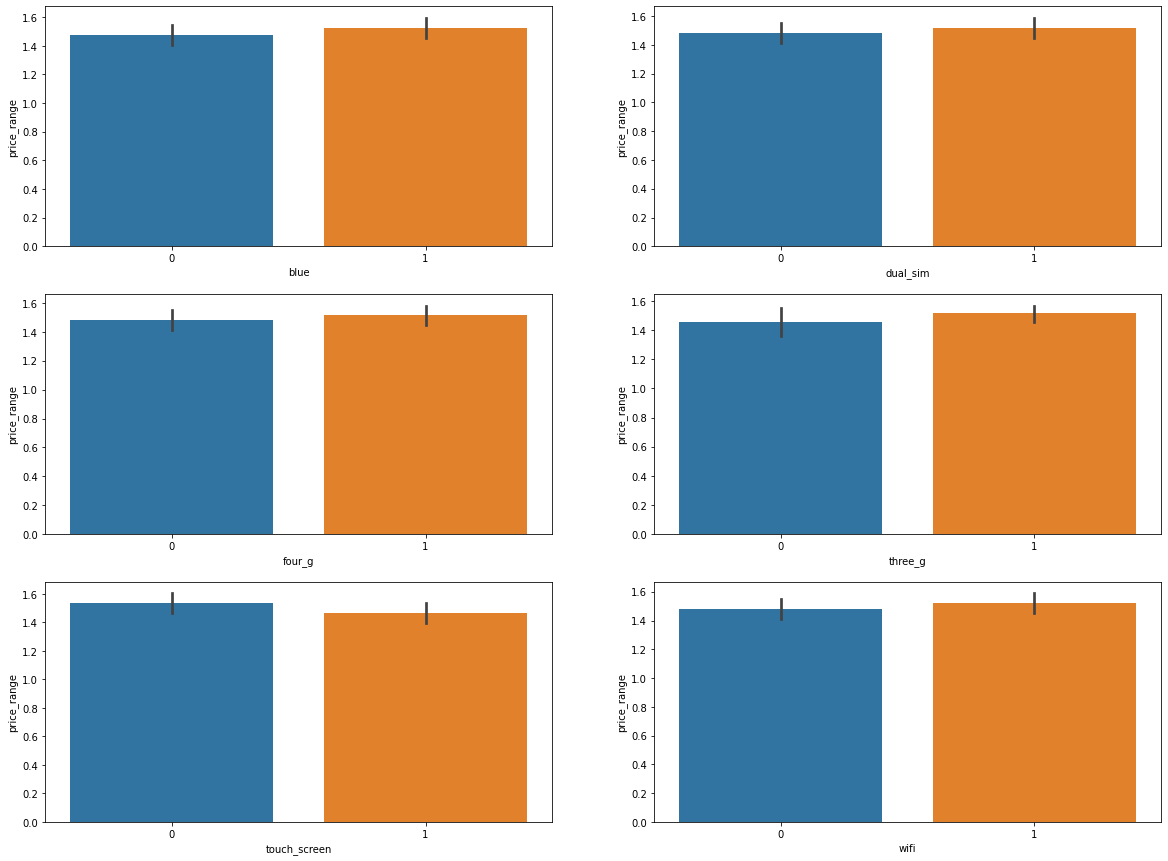

In [16]:
i=1
plt.figure(figsize=(20,15))
for col in binary_cols:
    plt.subplot(3,2,i)
    sns.barplot(data=mobile_prediction_data,x=col,y="price_range")
    i+=1

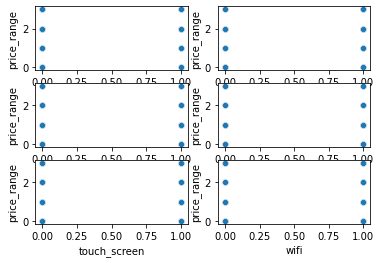

In [17]:
i=1
for col in binary_cols:
    plt.subplot(3,2,i)
    sns.scatterplot(data=mobile_prediction_data,x=col,y="price_range")
    i+=1

In [18]:
cont_var

Index(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], dtype='object')

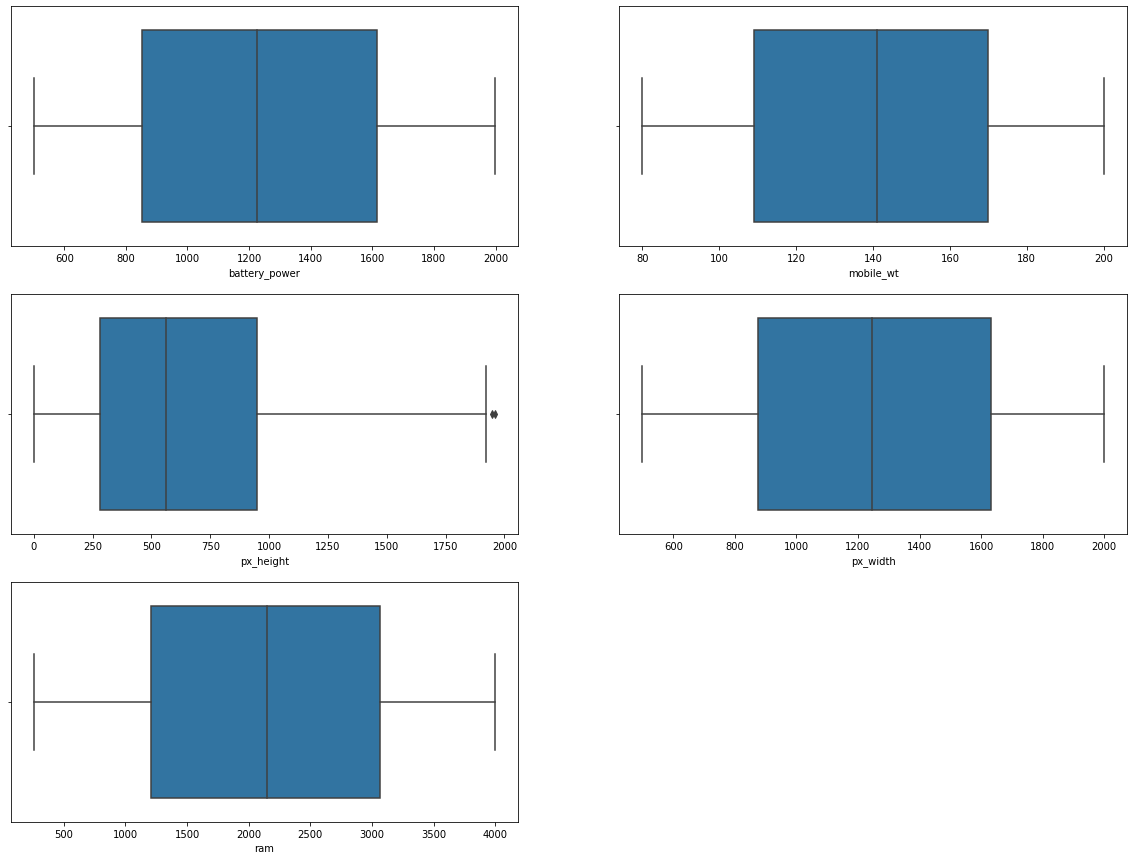

In [19]:
i=1
plt.figure(figsize=(20,15))
for col in cont_var:
    plt.subplot(3,2,i)
    sns.boxplot(data=mobile_prediction_data,x=col,hue="price_range")
    i+=1

In [20]:
mobile_prediction_data=mobile_prediction_data.drop(["three_g","touch_screen","wifi","blue"],axis=1)

In [21]:
y=mobile_prediction_data.pop("price_range")
X=mobile_prediction_data
print(X.shape)
print(y.shape)

(2000, 16)
(2000,)


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.5,random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 16)
(1000, 16)
(1000,)
(1000,)


In [24]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
y_train.values

array([0, 3, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 3, 1, 3, 3, 2, 2, 2, 1,
       3, 0, 1, 1, 3, 3, 3, 3, 2, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 2,
       1, 1, 3, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 3, 2, 2, 0, 2, 3, 1,
       0, 0, 0, 0, 3, 0, 3, 2, 2, 1, 0, 3, 1, 0, 2, 1, 3, 1, 2, 3, 2, 2,
       1, 2, 0, 2, 3, 1, 0, 0, 3, 0, 0, 2, 1, 3, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 1, 3, 0, 2, 3, 1, 1, 1, 3, 2, 3, 1, 0, 3, 2, 3, 3, 3, 1, 2, 3,
       1, 2, 3, 1, 1, 3, 1, 2, 1, 1, 0, 2, 3, 2, 2, 1, 0, 0, 0, 2, 3, 1,
       3, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 3, 1, 3, 2, 1, 2, 0, 1,
       3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 0, 1, 0, 3, 2, 3, 2, 2, 0, 0,
       1, 2, 0, 1, 3, 2, 3, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 3, 2, 2, 3, 1,
       2, 0, 2, 2, 3, 3, 1, 1, 3, 2, 3, 0, 2, 1, 2, 2, 0, 0, 2, 2, 3, 2,
       2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 3, 3, 2, 3, 0, 2, 1, 1, 0, 3, 1,
       3, 3, 1, 2, 1, 3, 1, 2, 0, 2, 2, 3, 0, 2, 3, 0, 2, 1, 0, 0, 0, 2,
       1, 2, 0, 3, 3, 1, 0, 1, 3, 0, 1, 3, 3, 3, 2,

In [26]:
rf_model=RandomForestClassifier()
bg_classifier=BaggingClassifier()

In [27]:
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [28]:
bg_classifier.fit(X_train_scaled,y_train)

BaggingClassifier()

In [29]:
y_pred=rf_model.predict(X_test_scaled)
y_pred_bg=bg_classifier.predict(X_test_scaled)

In [30]:
accuracy_score(y_test,y_pred_bg)

0.877

In [31]:
accuracy_score(y_test,y_pred)

0.888

In [32]:
list(zip(mobile_prediction_data.columns,rf_model.feature_importances_))

[('battery_power', 0.0791606262334581),
 ('clock_speed', 0.026505263062401325),
 ('dual_sim', 0.006395030023301753),
 ('fc', 0.024825996762542525),
 ('four_g', 0.006307063102890333),
 ('int_memory', 0.038543063857638414),
 ('m_dep', 0.02706230761678745),
 ('mobile_wt', 0.03764869069690959),
 ('n_cores', 0.022023793660951238),
 ('pc', 0.028160944921939705),
 ('px_height', 0.06272275843934941),
 ('px_width', 0.05869604738384905),
 ('ram', 0.4944972074681499),
 ('sc_h', 0.02598660181559627),
 ('sc_w', 0.02843322842834614),
 ('talk_time', 0.03303137652588871)]

In [33]:
#exclude- three_g,touch_screen,wifi,blue
